## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d=pd.read_csv('cleaned_data.csv')

## Handle categorical variables with numerically coded values

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
d.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## Out of 21 attributes,we don't need to any attribute as categorical variables.As all the attributes are themselves categorical.

In [5]:
d.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Text(0, 0.5, 'BYTES')

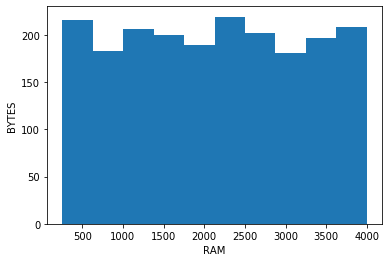

In [6]:
d['ram'].plot.hist()
plt.xlabel('RAM')
plt.ylabel('BYTES')

## Perform univariate and bivariate analysis and derive meaningful insights about the dataset

## Comparing ram column with price_range column

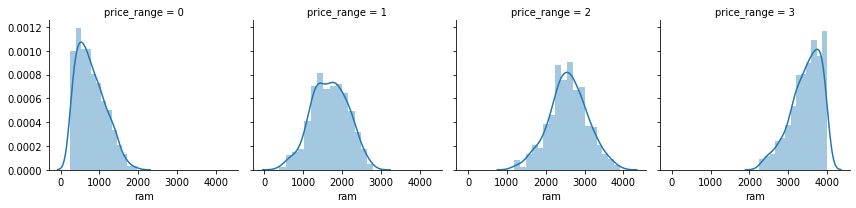

In [7]:
g=sns.FacetGrid(d,col='price_range')
g=g.map(sns.distplot,"ram")
plt.show()

## Taking battery_power attribute

Text(0, 0.5, 'Frequency')

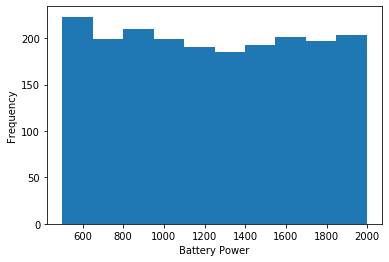

In [8]:
d['battery_power'].plot.hist()
plt.xlabel('Battery Power')
plt.ylabel('Frequency')


## Checking missing values

In [9]:
d.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


Text(0.5, 1.0, 'Price Range')

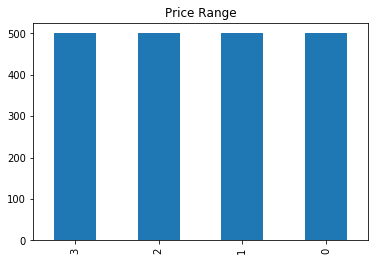

In [10]:
print(d.price_range.value_counts())
d['price_range'].value_counts().plot(kind='bar').set_title('Price Range')

## Removing columns with null values

In [11]:
d.drop('price_range', axis=1,inplace=True)
d.shape

(2000, 20)

## Build a correlation matrix to identify relevant variables ( Graph )

In [12]:
matrix=d.corr()
matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


### In correlation matrix, value ranges from -1 to 1. The correlation coefficient closer to boundary values (-1 to 1) shows higher correlation between the variables and are considered relevant. Whereas, closer the values to 0 lesser the correlation between the variables

## Mapping heat map to visualize correlation

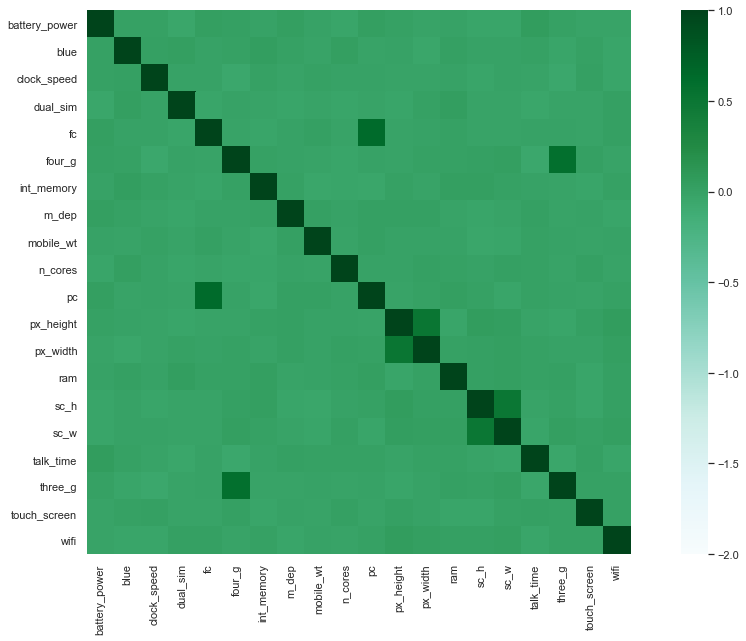

In [35]:
sns.set(rc={'figure.figsize':(18,10)}) 
sns.heatmap(matrix,square=True,cmap="BuGn",vmin=-2)    